## user  
./sample_data/chinook.db のsqlite3データベースから、最も多くのトラックを持つアルバムの名前を調べてください。

## assistant  
None

In [1]:
import sqlite3
# Connect to the SQLite database
conn = sqlite3.connect('./sample_data/chinook.db')
cursor = conn.cursor()
# Query to find the album(s) with the most tracks
query = '''
SELECT albums.Title, COUNT(tracks.TrackId) AS track_count
FROM albums
JOIN tracks ON albums.AlbumId = tracks.AlbumId
GROUP BY albums.AlbumId
ORDER BY track_count DESC
LIMIT 1;
'''
cursor.execute(query)
result = cursor.fetchall()
conn.close()
result

[('Greatest Hits', 57)]

## assistant  
最も多くのトラックを持つアルバムは「Greatest Hits」で、トラック数は57曲です。

## user  
二番目に多いアルバムは何ですか？

## assistant  
None

In [2]:
import sqlite3
# Connect to the SQLite database
conn = sqlite3.connect('./sample_data/chinook.db')
cursor = conn.cursor()
# Query to find the album with the second most tracks
query = '''
SELECT albums.Title, COUNT(tracks.TrackId) AS track_count
FROM albums
JOIN tracks ON albums.AlbumId = tracks.AlbumId
GROUP BY albums.AlbumId
ORDER BY track_count DESC
LIMIT 1 OFFSET 1;
'''
cursor.execute(query)
second_result = cursor.fetchall()
conn.close()
second_result

[('Minha Historia', 34)]

## assistant  
二番目に多いトラックを持つアルバムは「Minha Historia」で、トラック数は34曲です。

## user  
アルバムとトラック数をグラフにしてください

## assistant  
None

/tmp/ipykernel_69086/3129702237.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


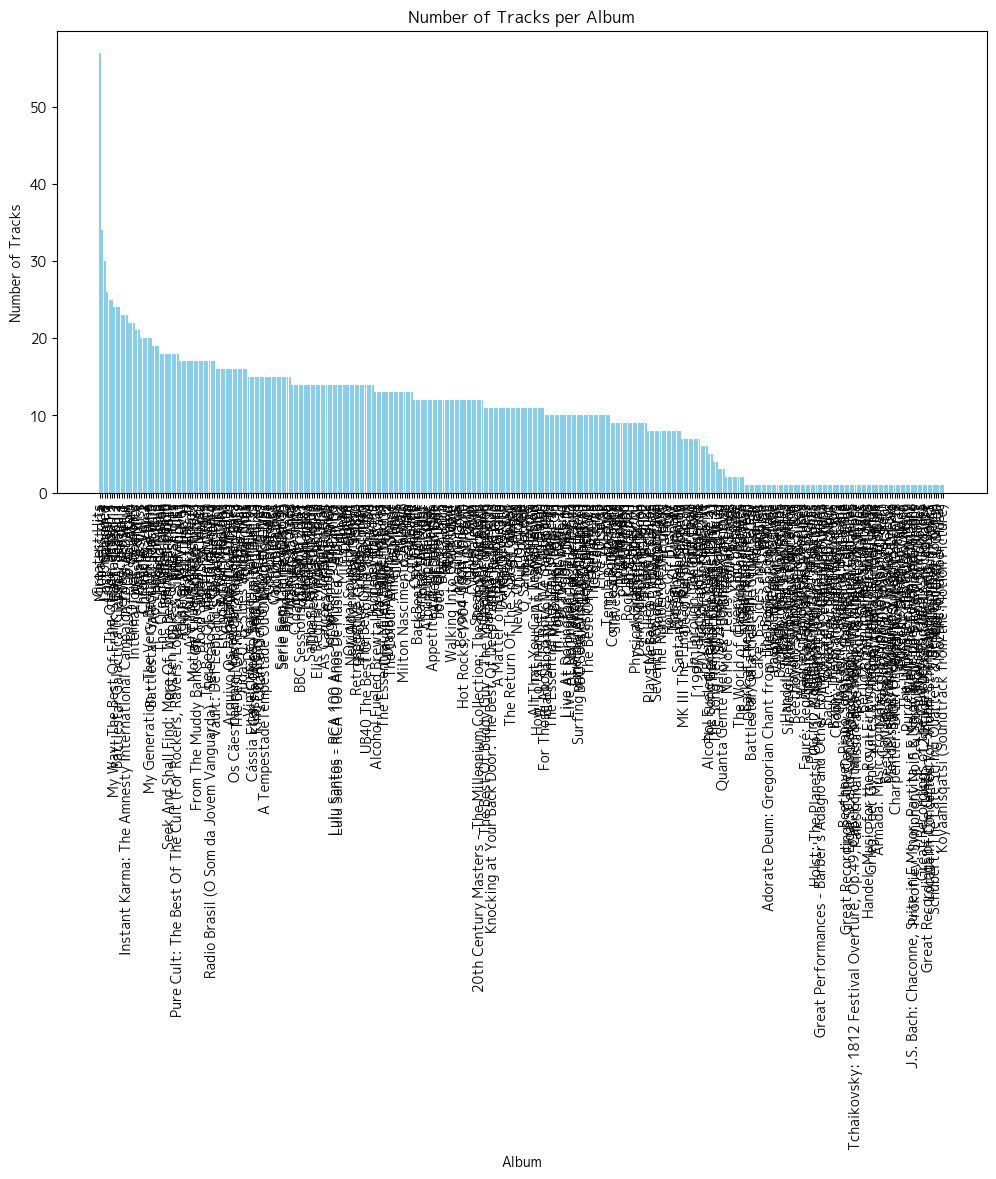

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database and fetch album track counts
db_path = './sample_data/chinook.db'
conn = sqlite3.connect(db_path)
query = '''
SELECT albums.Title AS album, COUNT(tracks.TrackId) AS track_count
FROM albums
JOIN tracks ON albums.AlbumId = tracks.AlbumId
GROUP BY albums.AlbumId
ORDER BY track_count DESC;
'''
df = pd.read_sql_query(query, conn)
conn.close()

# Plot bar chart
df_top = df  # using all albums
plt.figure(figsize=(12, 6))
plt.bar(df_top['album'], df_top['track_count'], color='skyblue')
plt.xlabel('Album')
plt.ylabel('Number of Tracks')
plt.title('Number of Tracks per Album')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## assistant  
アルバムごとのトラック数を棒グラフで可視化しました。  
- 横軸：アルバム名  
- 縦軸：トラック数  

グラフをご確認ください。もし特定の上位数アルバムのみ表示するなど、ご要望があればお知らせください。